In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set(style='ticks', color_codes=True)

sns.set_palette('pastel')

In [50]:
df = pd.read_csv('data/supermarket_sales_vn.csv')
df.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,9.1
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,3/8/19,10:29,Cash,76.40,9.6
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,7.4
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,8.4
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,5.3


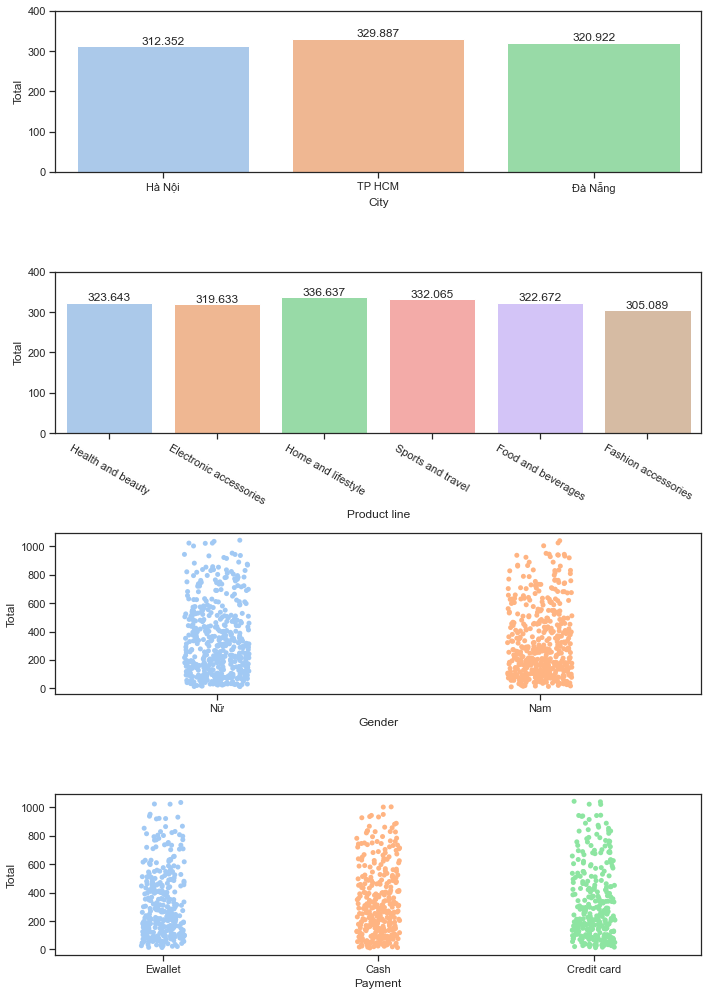

In [80]:
fig = plt.figure(figsize=(10,14))
ax1 = fig.add_subplot(4,1,1)
sns.barplot(data=df, x='City', y='Total', ci=0, dodge=True,ax=ax1)
ax1.set_ylim([0,400])
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(4,1,2)
sns.barplot(data=df, x='Product line', y='Total', ci=0, ax=ax2)
ax2.set_xticklabels(product_labels,rotation=-30)
ax2.set_ylim([0,400])
for i in ax2.containers:
    ax2.bar_label(i)
    
ax3 = fig.add_subplot(4,1,3)
sns.stripplot(data=df, x='Gender', y='Total', ax=ax3)

ax4 = fig.add_subplot(414)
sns.stripplot(ax=ax4, data=df, x='Payment', y='Total')

plt.tight_layout()
plt.show()

# Phân bổ số lượng theo đơn hàng

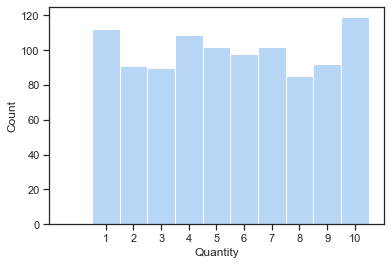

In [211]:
quantity = df['Quantity'].values
vals, counts = np.unique(quantity, return_counts=True)

#vẽ phân bố số lượng đơn theo số mặt hàng
fig = plt.figure()
ax = fig.add_subplot()
N = vals.size
labels = np.hstack([[1], range(2,11,1)])
sns.histplot(data=df, x='Quantity', bins=np.arange(N+2), ax=ax)
ax.set_xticks(labels+.5)
ax.set_xticklabels(range(1,11))
plt.show()

# Ngày nào bận rộn nhất tuần, thời điểm nào bận rộn nhất ngày.

In [35]:
df1 = pd.read_csv('data/supermarket_sales_vn.csv', parse_dates=[['Date','Time']])
df1 = df1.rename(columns={'Date_Time':'Timestamp'})

df1['hour'] = df1['Timestamp'].dt.hour

df1['dow'] = df1['Timestamp'].dt.day_name()

In [13]:
df1.head()

,Timestamp,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,Rating,hour,dow
0,2019-01-05 13:08:00,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,9.1,13,Saturday
1,2019-03-08 10:29:00,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,9.6,10,Friday
2,2019-03-03 13:23:00,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,7.4,13,Sunday
3,2019-01-27 20:33:00,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,8.4,20,Sunday
4,2019-02-08 10:37:00,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,5.3,10,Friday


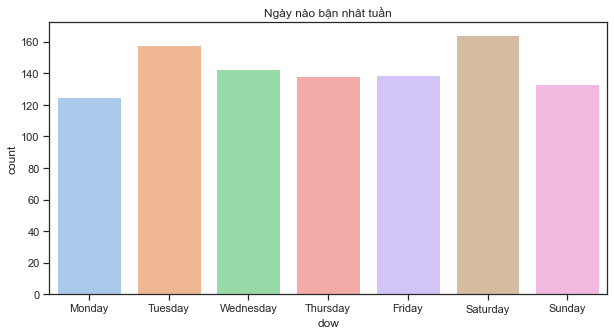

In [38]:
#Ngày nào bận nhất tuần theo seaborn
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df1,x='dow', ax=ax, order=dow_order)
ax.set_title('Ngày nào bận nhât tuần')
plt.show()

In [7]:
dow = df1['dow1'].value_counts().sort_index(ascending=True).reset_index()
dow.columns=['dow','count']
dow

,dow,count
0,0,125
1,1,158
2,2,143
3,3,138
4,4,139
5,5,164
6,6,133


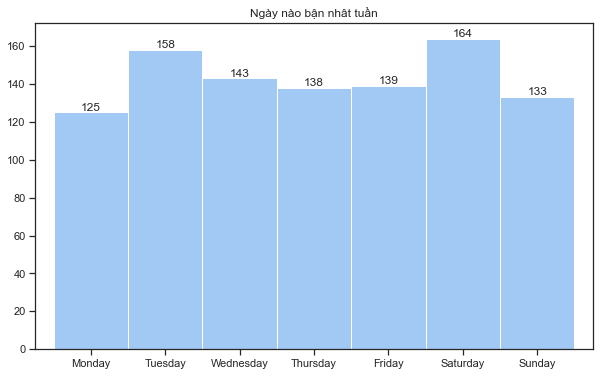

In [39]:
#Ngày nào bận nhất tuần theo DataFrame.plot.bar
fig,ax=plt.subplots(figsize=(10,6))
dow['count'].plot.bar(ax=ax, width=1,rot='horizontal')
ax.bar_label(container = ax.containers[0])
ax.set_xticklabels(dow_order)
ax.set_title('Ngày nào bận nhât tuần')
plt.show()

In [31]:
# Buổi nào bận rộn nhất trong tuần.
tod = pd.DataFrame(['Night'] * df1['hour'].size)

tod[df1['hour']<12] = 'Morning'
tod[(df1['hour']>=12) & (df1['hour']<18)] = 'Evening'
df1['tod'] = tod

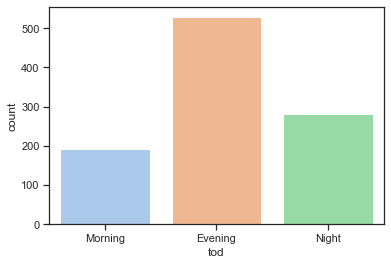

In [32]:
tod_order=['Morning','Evening','Night']
sns.countplot(data=df1, x='tod', order=tod_order)
plt.show()

# Doanh thu: tỷ lệ tổng doanh thu theo chi nhánh, nhóm hàng, giới tính

In [72]:
df3 = pd.read_csv('data/supermarket_sales_vn.csv', usecols=['City','Total','Gender','Product line'])
df3.head()

,City,Gender,Product line,Total
0,Hà Nội,Nữ,Health and beauty,548.9715
1,TP HCM,Nữ,Electronic accessories,80.2200
2,Hà Nội,Nam,Home and lifestyle,340.5255
3,Hà Nội,Nam,Health and beauty,489.0480
4,Hà Nội,Nam,Sports and travel,634.3785


In [203]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

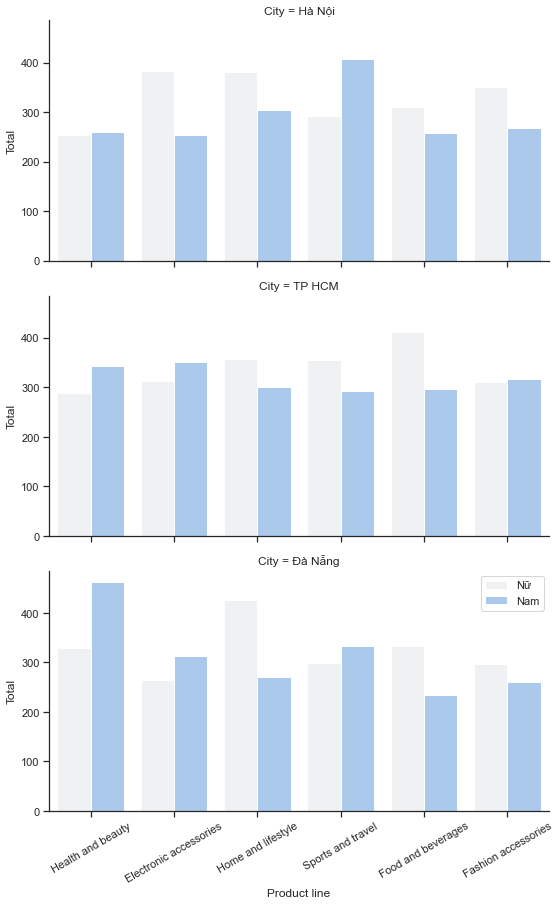

In [206]:
product_order = ['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories']
bieudo = sns.FacetGrid(df3, row='City',aspect=2, height=4)
bieudo.map_dataframe(sns.barplot, x='Product line', y='Total', hue='Gender', ci=0, order=product_order)
plt.tight_layout()
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Thuế: tỷ lệ tổng thuế theo chi nhánh, nhóm hàng, giới tính

In [197]:
df4 = pd.read_csv('data/supermarket_sales_vn.csv',usecols=['City','Gender','Tax 5%','Product line'])
df4.head()

,City,Gender,Product line,Tax 5%
0,Hà Nội,Nữ,Health and beauty,26.1415
1,TP HCM,Nữ,Electronic accessories,3.8200
2,Hà Nội,Nam,Home and lifestyle,16.2155
3,Hà Nội,Nam,Health and beauty,23.2880
4,Hà Nội,Nam,Sports and travel,30.2085


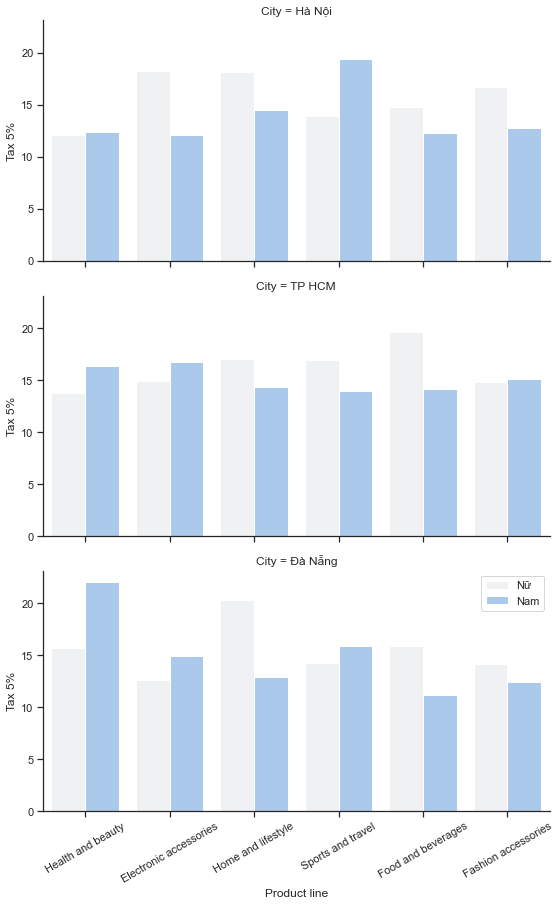

In [207]:
bieudo1 = sns.FacetGrid(df4, row='City', height=4, aspect=2)
bieudo1.map_dataframe(sns.barplot, x='Product line', y='Tax 5%', hue='Gender', ci=0, order=product_order)
plt.tight_layout()
plt.xticks(rotation=30)
plt.legend()
plt.show()
plt.close('all')

# Rating: so sánh rating giữa các nhóm hàng, giữa các ngày trong tuần, giới tính

In [212]:
df5 = pd.read_csv('data/supermarket_sales_vn.csv', parse_dates=['Date'])
df5['dow'] = df5['Date'].dt.day_name()
df5.head()


,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,Rating,dow
0,750-67-8428,Hà Nội,Member,Nữ,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1,Saturday
1,226-31-3081,TP HCM,Normal,Nữ,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6,Friday
2,631-41-3108,Hà Nội,Normal,Nam,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4,Sunday
3,123-19-1176,Hà Nội,Member,Nam,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4,Sunday
4,373-73-7910,Hà Nội,Normal,Nam,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,5.3,Friday


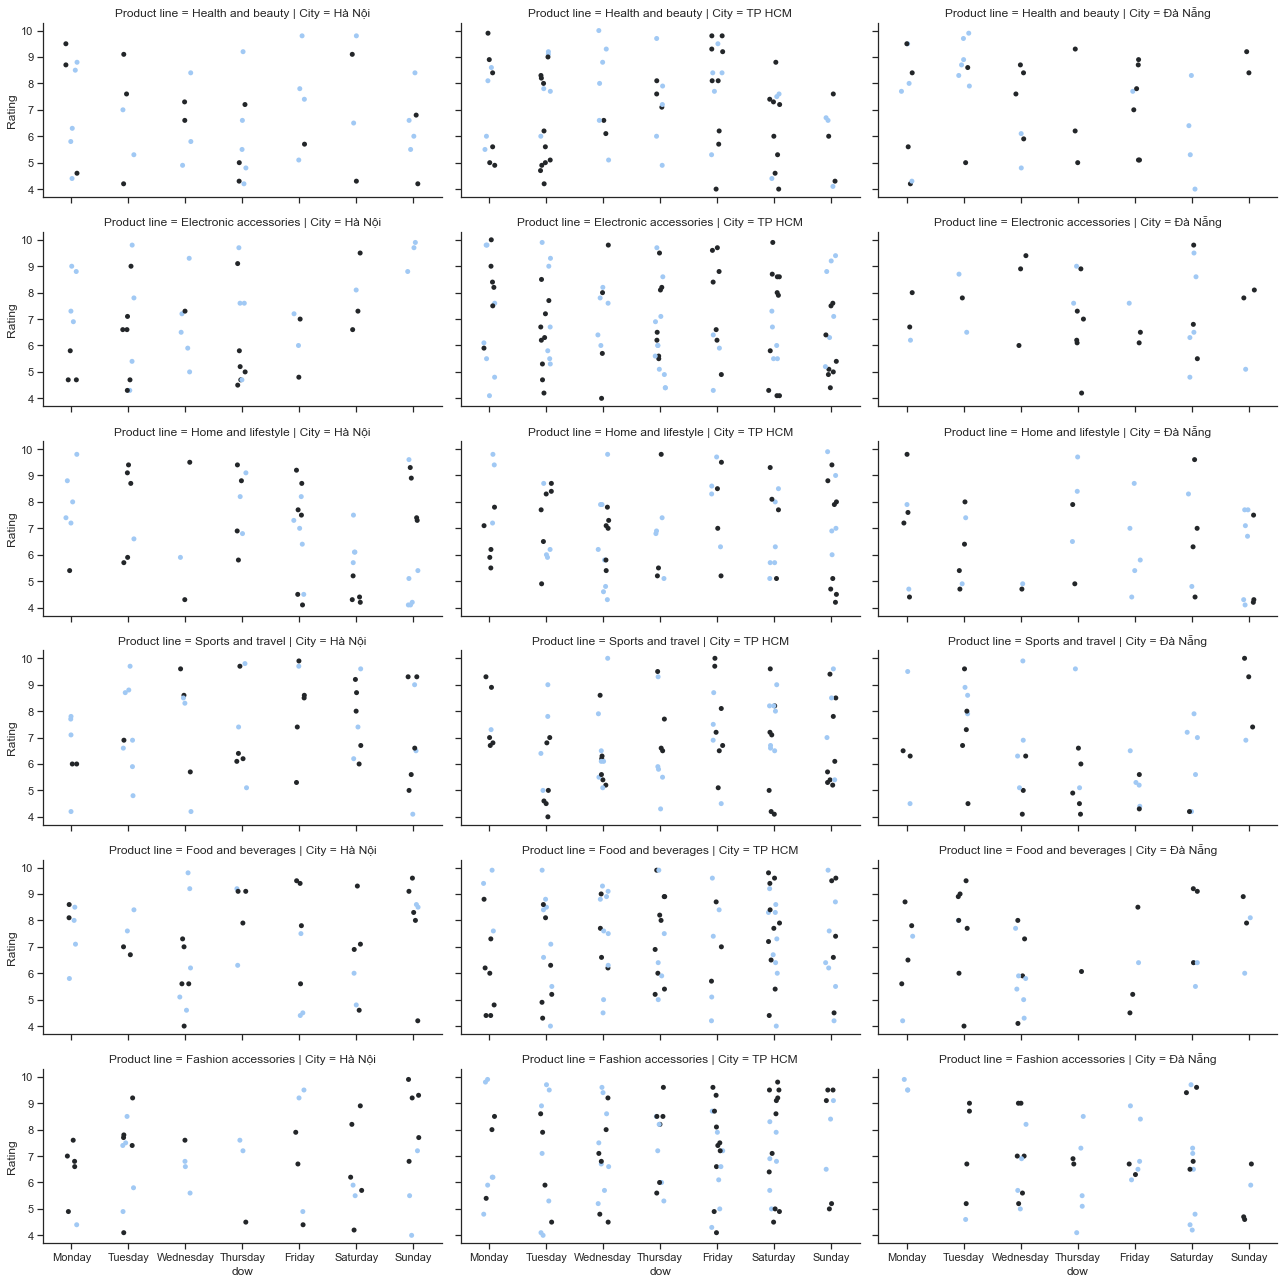

In [216]:
bieudo2 = sns.FacetGrid(data=df5, 
                        row='Product line',
                        col='City',
                        aspect=2,
                        height=3
                       )
bieudo2.map_dataframe(sns.stripplot, x='dow', y='Rating',hue='Gender', order=dow_order)
plt.tight_layout()
plt.show()

--

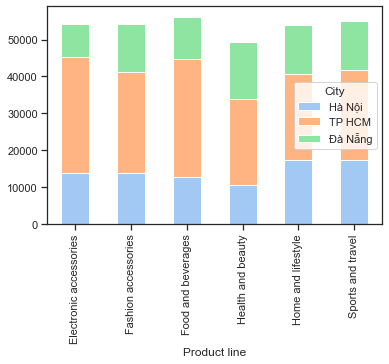

In [141]:
#test
a = df3.groupby(['Product line','City'])['Total'].sum()
#a.columns=[['Product_line','City','Total']]
a1 = a.unstack()
a1.reset_index()
a1.plot.bar(stacked=True)
plt.show()